In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv(r"C:\Users\Rohan\Downloads\new_york_listings_2024\new_york_listings_2024.csv")

data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,24736896,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,2023-09-29,1.81,1,157,12,No License,4.75,1,1,1
20754,2835711,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,2023-07-01,0.48,1,0,1,No License,4.46,1,2,1
20755,51825274,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,2023-12-08,2.09,1,0,27,No License,4.93,1,1,1
20756,782661008019550832,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,2023-09-17,0.91,1,363,7,No License,5.0,1,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [5]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [6]:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['bedrooms'] = pd.to_numeric(data['bedrooms'].replace({'Studio': 0}))
data['baths'] = pd.to_numeric(data['baths'].replace({'Not specified': np.nan}))

In [7]:
data['rating'] = data['rating'].fillna(data['rating'].median())
data['baths'] = data['baths'].fillna(data['baths'].median())



### As we are performing prediction model we remove all unwanted columns

In [8]:
data_cln= data.drop(columns=['id',	'name',	'host_id',	'host_name','license','latitude','longitude','last_review','number_of_reviews_ltm'])
data_cln

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,rating,bedrooms,beds,baths
0,Brooklyn,Clinton Hill,Private room,55.0,30,3,0.03,1,0,5.00,1,1,1.0
1,Manhattan,Hell's Kitchen,Entire home/apt,144.0,30,9,0.24,139,364,4.67,2,1,1.0
2,Manhattan,Chelsea,Entire home/apt,187.0,2,6,1.67,1,343,4.17,1,2,1.0
3,Manhattan,Washington Heights,Private room,120.0,30,156,1.38,2,363,4.64,1,1,1.0
4,Manhattan,Murray Hill,Entire home/apt,85.0,30,11,0.24,133,335,4.91,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Manhattan,Lower East Side,Private room,45.0,30,124,1.81,1,157,4.75,1,1,1.0
20754,Manhattan,Greenwich Village,Entire home/apt,105.0,30,56,0.48,1,0,4.46,1,2,1.0
20755,Manhattan,Hell's Kitchen,Entire home/apt,299.0,30,60,2.09,1,0,4.93,1,1,1.0
20756,Manhattan,Chinatown,Entire home/apt,115.0,30,7,0.91,1,363,5.00,1,1,1.0


In [9]:
data_cln.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,rating,bedrooms,beds,baths
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,4.747944,1.306725,1.723721,1.177883
std,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,0.268045,0.877419,1.212272,0.480326
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.750000,0.000000,1.000000,0.000000
25%,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,4.680000,1.000000,1.000000,1.000000
50%,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,4.810000,1.000000,1.000000,1.000000
75%,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,4.910000,2.000000,2.000000,1.000000
max,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,5.000000,15.000000,42.000000,15.500000


{'whiskers': [<matplotlib.lines.Line2D at 0x289a051df90>,
 'caps': [<matplotlib.lines.Line2D at 0x289a051e210>,
 'boxes': [<matplotlib.lines.Line2D at 0x289a01d5d10>],
 'medians': [<matplotlib.lines.Line2D at 0x289a051e490>],
 'fliers': [<matplotlib.lines.Line2D at 0x289a051e5d0>],
 'means': []}

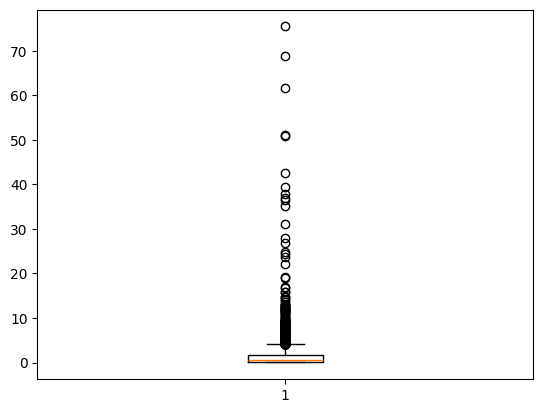

In [10]:
plt.boxplot(data['reviews_per_month'])

{'whiskers': [<matplotlib.lines.Line2D at 0x289a05f0190>,
 'caps': [<matplotlib.lines.Line2D at 0x289a05f0410>,
 'boxes': [<matplotlib.lines.Line2D at 0x289a05f0050>],
 'medians': [<matplotlib.lines.Line2D at 0x289a05f0690>],
 'fliers': [<matplotlib.lines.Line2D at 0x289a05f07d0>],
 'means': []}

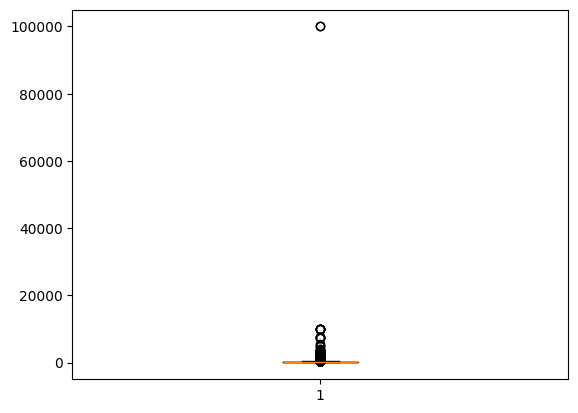

In [11]:
plt.boxplot(data['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x289a0627c50>,
 'caps': [<matplotlib.lines.Line2D at 0x289a0627ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x289a0627b10>],
 'medians': [<matplotlib.lines.Line2D at 0x289a0660190>],
 'fliers': [<matplotlib.lines.Line2D at 0x289a06602d0>],
 'means': []}

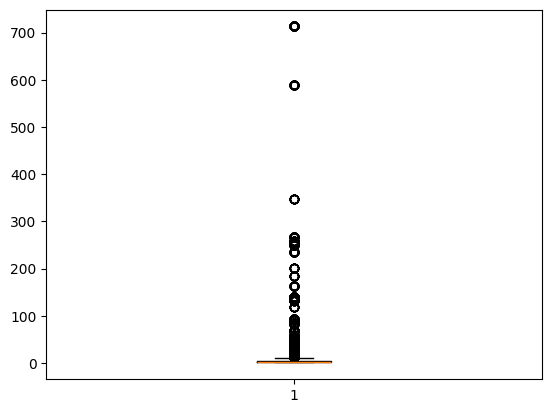

In [12]:
plt.boxplot(data['calculated_host_listings_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x289a0687ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x289a06c8190>,
 'boxes': [<matplotlib.lines.Line2D at 0x289a0687d90>],
 'medians': [<matplotlib.lines.Line2D at 0x289a06c8410>],
 'fliers': [<matplotlib.lines.Line2D at 0x289a06c8550>],
 'means': []}

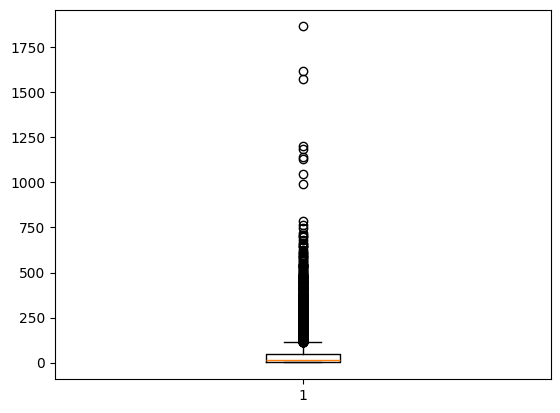

In [13]:
plt.boxplot(data['number_of_reviews'])

#### we can see there are outliers in the columns so what we do is we choose the data that are correct

In [14]:
a=len(data[data['price']>4000])

b=len(data[data['price']==0])

print('values over 1000$: ',a)
print('\n')
print('values equal to 0$: ',b)
print('\n')
print('total percentage of outliers in price column:',((a/data.shape[0])*100) + ( (b/data.shape[0])*100)) 


values over 1000$:  17


values equal to 0$:  0


total percentage of outliers in price column: 0.08189613642932846


In [15]:
b=len(data[data['minimum_nights']>30])
print('min nights greater than 30 days:',b)
print('outliers percetage',(b/data.shape[0])*100)

min nights greater than 30 days: 829
outliers percetage 3.993641005877252


In [16]:
b=len(data[data['calculated_host_listings_count']>150])
print('host listing count greater than 150:',b)
print('outliers percetage',(b/data.shape[0])*100)

host listing count greater than 150: 646
outliers percetage 3.112053184314481


## Removing Outliers
#### So In the price column we only remove all the data that has values above 4000 and values that are zero which is about 0.08% of outliers
#### in minimum night column we remove the the value greater than 30 day as most of the people wont stay in airbnb more than a month which is about 1.5 % of outliers

#### And it is ok to to loose 2.5% of the data so that we can get the correct data

In [17]:
clean_dta= data_cln[(data['price']<=4000) & (data['price']>0) & (data['minimum_nights']<=30)  & (data['calculated_host_listings_count']<150) & (data['reviews_per_month']<20) & (data['baths']<=8) & (data['beds']<=15) ].copy()

clean_dta.reset_index(drop=True,inplace=True)
clean_dta

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,rating,bedrooms,beds,baths
0,Brooklyn,Clinton Hill,Private room,55.0,30,3,0.03,1,0,5.00,1,1,1.0
1,Manhattan,Hell's Kitchen,Entire home/apt,144.0,30,9,0.24,139,364,4.67,2,1,1.0
2,Manhattan,Chelsea,Entire home/apt,187.0,2,6,1.67,1,343,4.17,1,2,1.0
3,Manhattan,Washington Heights,Private room,120.0,30,156,1.38,2,363,4.64,1,1,1.0
4,Manhattan,Murray Hill,Entire home/apt,85.0,30,11,0.24,133,335,4.91,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19380,Manhattan,Lower East Side,Private room,45.0,30,124,1.81,1,157,4.75,1,1,1.0
19381,Manhattan,Greenwich Village,Entire home/apt,105.0,30,56,0.48,1,0,4.46,1,2,1.0
19382,Manhattan,Hell's Kitchen,Entire home/apt,299.0,30,60,2.09,1,0,4.93,1,1,1.0
19383,Manhattan,Chinatown,Entire home/apt,115.0,30,7,0.91,1,363,5.00,1,1,1.0


clean_dta= data[(data['price']>0) & (data['minimum_nights']>0)].copy()

clean_dta.reset_index(drop=True,inplace=True)
clean_dta

In [22]:
clean_dta.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,rating,bedrooms,beds,baths
count,19385.000000,19385.000000,19385.000000,19385.000000,19385.000000,19385.000000,19385.000000,19385.000000,19385.000000,19385.000000
mean,173.529327,25.691514,43.653908,1.279120,8.356925,206.005520,4.749016,1.313335,1.738973,1.177792
std,194.884410,10.077243,68.696163,1.481595,20.422469,134.940442,0.267280,0.870387,1.179889,0.465343
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.750000,0.000000,1.000000,0.000000
25%,81.000000,30.000000,4.000000,0.230000,1.000000,87.000000,4.680000,1.000000,1.000000,1.000000
50%,125.000000,30.000000,16.000000,0.720000,2.000000,213.000000,4.810000,1.000000,1.000000,1.000000
75%,199.000000,30.000000,52.000000,1.880000,5.000000,353.000000,4.910000,2.000000,2.000000,1.000000
max,4000.000000,30.000000,745.000000,19.120000,139.000000,365.000000,5.000000,9.000000,14.000000,7.000000


In [23]:
clean_dta['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)



# Prediction Using MLR

#### we need to predict the price based on differenct factors

#### Let us first change the categorical values to numeric values so that it will be easier for prediciton
#### so convert the neighbourhood_group,neighbourhood, and room_type


In [24]:
from sklearn import preprocessing
label_enc=preprocessing.LabelEncoder()
clean_dta['neighbourhood_group']=label_enc.fit_transform(clean_dta['neighbourhood_group'])
clean_dta['neighbourhood_group'].unique()

array([1, 2, 3, 0, 4])

In [25]:
clean_dta['neighbourhood']=label_enc.fit_transform(clean_dta['neighbourhood'])
clean_dta['neighbourhood'].unique()

array([ 42,  96,  34, 206, 138, 214, 190,   4,  74, 189, 128,  60, 209,
       109,  28, 162, 197, 220, 169,  49,  95, 200,  78,  92, 166,  53,
       157, 156,  65, 202,  40,  13,  90, 118,  87,  61,  62, 186,  19,
       181, 151,  52, 205,  80, 183, 146,  16,  51, 196,  75, 160, 159,
        81,   0, 201, 164, 113, 131,  77, 185,   7, 178, 120, 207, 152,
        26, 150, 105, 110,  69, 158, 106,   2, 111, 114, 133, 171,   3,
       217, 147, 170, 194,  64,  72,  67,  10,  30, 213, 112, 163, 175,
        55, 125,  54, 191,  38,  36,  76, 145,   5,  63, 116,  83,  85,
       208,  31, 137, 216,  58, 124, 182,  27, 139, 188,  20,  59,  93,
       129,  45, 168, 135, 148, 132, 104,  44, 107,  23,  25, 204,  98,
       108,  50,   1, 143,  17, 100, 192,  29,   6,  11,  22, 119,  86,
       176,  79, 212, 199,  32,  18,  12, 155, 126, 144,  15, 136,  71,
       161, 130,  82,  70, 219,  41, 142,  89, 153,  68, 115, 180, 172,
        14, 141, 203, 103, 210, 184, 123, 127,  48, 195, 173, 12

In [26]:
clean_dta['room_type']=label_enc.fit_transform(clean_dta['room_type'])
clean_dta['room_type'].unique()

array([2, 0, 1, 3])

### All the columns are encoded now so we perfrom mlr

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
x=clean_dta[['neighbourhood_group','number_of_reviews' ,'minimum_nights','calculated_host_listings_count','reviews_per_month','room_type','availability_365','rating','bedrooms','beds','baths']]
y=clean_dta['price']
x.isnull().sum()

neighbourhood_group               0
number_of_reviews                 0
minimum_nights                    0
calculated_host_listings_count    0
reviews_per_month                 0
room_type                         0
availability_365                  0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [30]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=mlr.predict(x_test)
y_pred

array([-46.49385041,  80.17135757, 202.98014334, ..., 213.92858388,
       231.34503033,  90.37805582], shape=(3877,))

#### Calculating R2 score for identifying how will the model is performing for the data
#### and mean squared error

In [32]:
r2= r2_score(y_test, y_pred)
r2

0.3035756828438144

In [33]:
means=mean_squared_error(y_test, y_pred)
means

25907.49083730865

### Thismultiple linear regression model explains about 30% of the variation in Airbnb listing prices, which means it captures some trends but leaves a large portion unexplained. 
###  The average prediction error is around $104, which suggests the model's predictions are not very precise.

## These results indicate that the model is overfitting or experiencing multicollinearity

In [34]:
import seaborn as sns

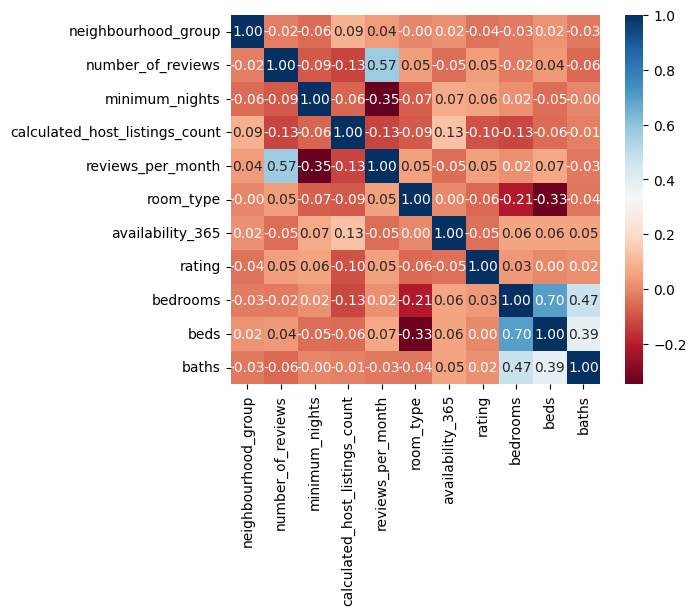

In [35]:
x=clean_dta[['neighbourhood_group','number_of_reviews' ,'minimum_nights','calculated_host_listings_count','reviews_per_month','room_type','availability_365','rating','bedrooms','beds','baths']]


a=x.corr()
sns.heatmap(a, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


In [36]:
prediction=pd.DataFrame({'Actual_data':y_test,
             'Predicted Data':y_pred,
             'Difference':y_test-y_pred})
prediction

,Actual_data,Predicted Data,Difference
17745,60.0,-46.493850,106.493850
3571,71.0,80.171358,-9.171358
5942,150.0,202.980143,-52.980143
2676,145.0,248.021918,-103.021918
11339,126.0,226.814758,-100.814758
...,...,...,...
2724,200.0,167.633423,32.366577
1333,250.0,197.180088,52.819912
12053,180.0,213.928584,-33.928584
7395,250.0,231.345030,18.654970


In [37]:
coefficients = mlr.coef_
intercept = mlr.intercept_

impact_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display results
print("Intercept (Base Price):", intercept)
print("\nImpact of Each Feature on Price:")
print(impact_df)

Intercept (Base Price): -140.63848392363258

Impact of Each Feature on Price:
                           Feature  Coefficient
10                           baths   109.979168
7                           rating    51.016488
5                        room_type   -40.783642
8                         bedrooms    26.120558
9                             beds    16.720338
4                reviews_per_month   -11.591405
0              neighbourhood_group     4.891608
2                   minimum_nights    -3.126456
3   calculated_host_listings_count    -0.568661
6                 availability_365     0.036617
1                number_of_reviews     0.001233


In [38]:
data.to_csv(r"C:\Users\Rohan\Downloads\new_york_listings_2024.csv",index=False)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_13064\553987328.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=clean_dta, x="room_type", y="price", estimator=np.mean, ci=None)


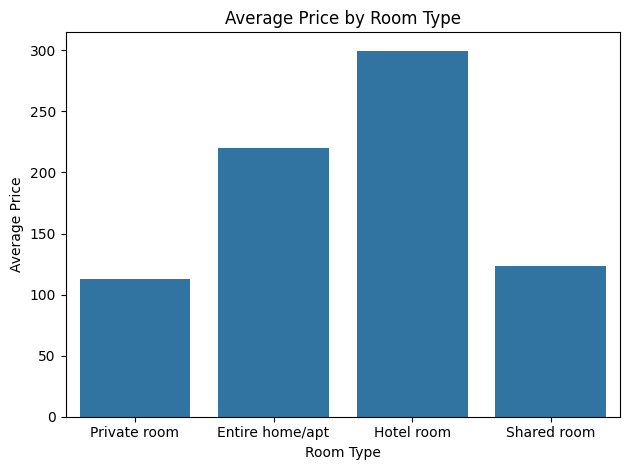

In [19]:
import seaborn as sns
plt.figure()
sns.barplot(data=clean_dta, x="room_type", y="price", estimator=np.mean, ci=None)
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()